In [1]:
# Assuming you have TensorFlow and Keras installed
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

2023-11-22 17:15:04.069507: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Generate some example data
np.random.seed(42)
# Replace this with your actual input data (word vectors)
x = np.random.rand(100, 50)  # Assuming 50-dimensional word vectors
# Replace this with your actual output data
y = 2 * x + 1 + 0.1 * np.random.randn(100, 50)

print(x[0])

print(y[0])

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041
 0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
 0.30461377 0.09767211 0.68423303 0.44015249 0.12203823 0.49517691
 0.03438852 0.9093204  0.25877998 0.66252228 0.31171108 0.52006802
 0.54671028 0.18485446]
[1.68938281 2.66239818 2.42276581 2.28866434 1.36580027 1.35480767
 1.08816789 2.60444922 2.25375946 2.33271697 1.25957866 2.99687043
 2.60682045 1.3635397  1.35435551 1.34285883 1.72016786 2.06815448
 1.79072686 1.77150235 2.22863662 1.35587169 1.52346665 1.76903525
 1.94325097 2.38138699 1.60087508 2.15753332 2.14510961 0.98267385
 2.24984587 1.34971802 1.16567008 2.91692881 2.98188817 2.76152527
 1.66603786 1.09037868 2.50472234 2.04

In [3]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [4]:
# Define the model
model = tf.keras.Sequential([
    # Adjust input shape based on your word vector dimensions
    tf.keras.layers.Dense(64, activation='relu', input_shape=(50,)),
    # Adjust output dimensions based on your desired output
    tf.keras.layers.Dense(50)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [5]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=16,
          validation_data=(x_test, y_test))

Epoch 1/50
5/5 [==============================] - 1s 40ms/step - loss: 4.2550 - val_loss: 3.8945
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 3.7618 - val_loss: 3.4242
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 3.2790 - val_loss: 2.9462
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 2.7698 - val_loss: 2.4362
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 2.2307 - val_loss: 1.9081
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 1.7045 - val_loss: 1.4153
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 1.2479 - val_loss: 1.0322
Epoch 8/50
5/5 [==============================] - 0s 9ms/step - loss: 0.9193 - val_loss: 0.7825
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 0.7136 - val_loss: 0.6280
Epoch 10/50
5/5 [==============================] - 0s 6ms/step - loss: 0.5848 - val_loss: 0.5178
Epoch 11/50
5/5 [===================

1/1 [==============================] - 0s 73ms/step
Mean Squared Error: 0.3193329634406466


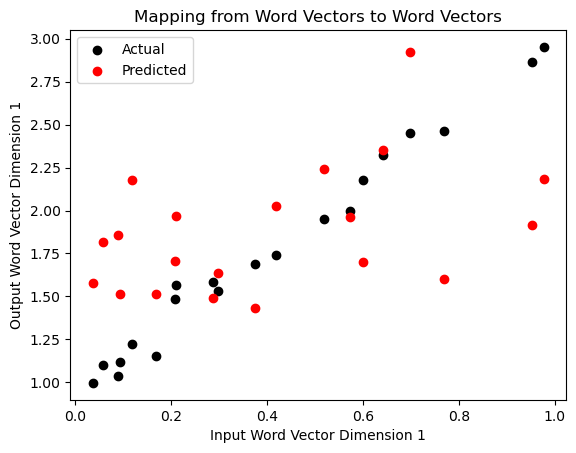

In [6]:
# Evaluate the model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the results (you might need to adjust based on the dimensionality of your vectors)
plt.scatter(x_test[:, 0], y_test[:, 0], color='black', label='Actual')
plt.scatter(x_test[:, 0], y_pred[:, 0], color='red', label='Predicted')
plt.xlabel('Input Word Vector Dimension 1')
plt.ylabel('Output Word Vector Dimension 1')
plt.title('Mapping from Word Vectors to Word Vectors')
plt.legend()
plt.show()